In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn
from tabulate import tabulate
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

pd.set_option('display.max_columns',500)

import os
for dirname, _, filenames in os.walk("/content/python customer segmentation.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Chart for Null values in data
def nullchart(df):
    null_appDF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
    null_appDF.columns = ['Column Name', 'Null Values Percentage']
    fig = plt.figure(figsize=(18,6))
    ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_appDF,color='blue')
    plt.xticks(rotation =90,fontsize =7)
    ax.axhline(40, ls='--',color='red')
    plt.title("Percentage of Missing values in data")
    plt.ylabel("Null Values PERCENTAGE")
    plt.xlabel("COLUMNS")
    plt.show()

In [7]:
def kmean_scatter(data, number):
    values = data.values
    columns = data.columns


    inertias = []


    n_clusters_range = range(1, 10)

    # Iterate over the range of n_clusters values
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++'
                    ,n_init='auto', max_iter=300, tol=0.0001, verbose=0
                    ,random_state=None, copy_x=True, algorithm='lloyd')
        kmeans.fit(values)
        inertias.append(kmeans.inertia_)

    # Plot the within-cluster sum of squares values
    plt.figure(figsize=(20,3))
    plt.plot(n_clusters_range, inertias)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.title('Elbow Method')
    plt.show();


    #number_clusters = int(input('How many clusters: '))
    number_clusters = number

    kmeans = KMeans(n_clusters=number_clusters, init='k-means++'
                    ,n_init='auto', max_iter=300, tol=0.0001, verbose=0
                    ,random_state=None, copy_x=True, algorithm='lloyd').fit(values)

    plt.figure(figsize=(10,7))
    sns.scatterplot(values, x=values[:,0], y=values[:,1], hue=kmeans.labels_, legend=False, palette='colorblind')
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='Yellow', s=100, label='Centroids')
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.show();
    return kmeans.labels_

In [8]:
data = pd.read_csv('/content/python customer segmentation.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


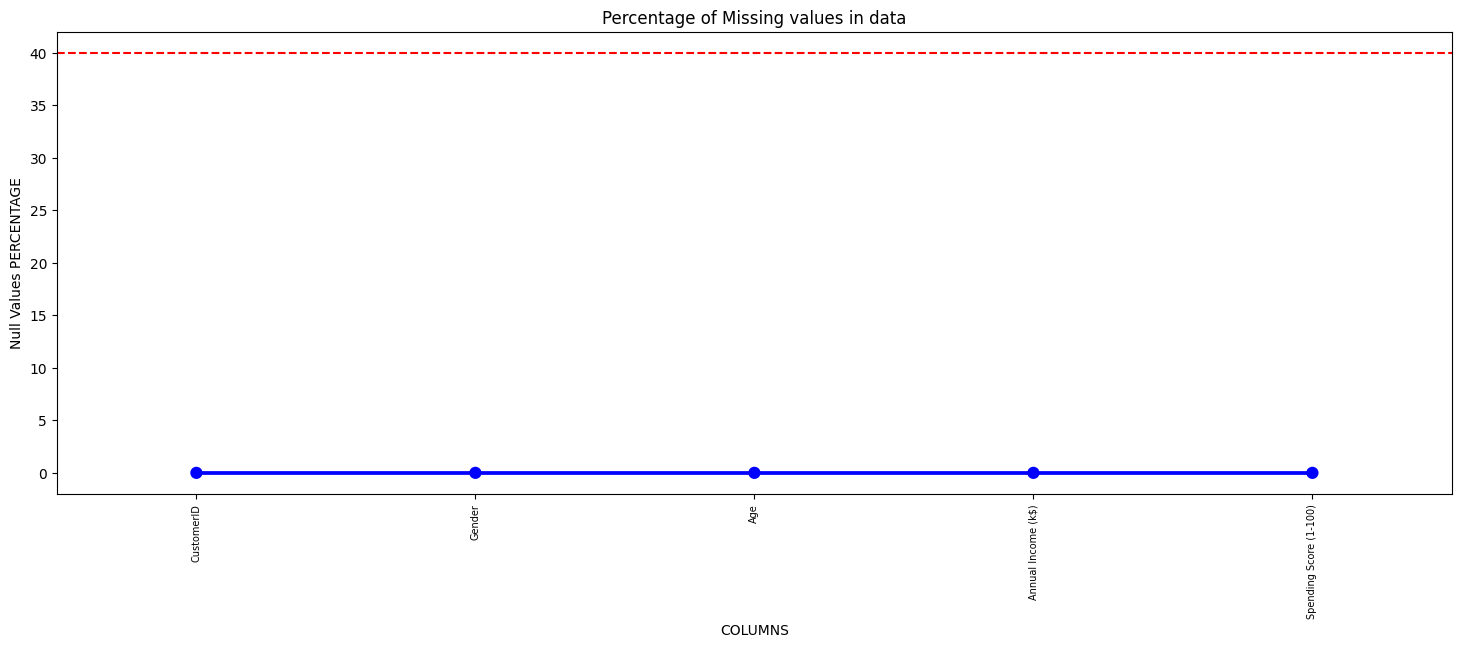

In [9]:
nullchart(data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
data[data.duplicated()].shape

(0, 5)

In [13]:
def unique_columns(data):


    table = []
    for column in data.columns:
        table.append([column, len(data[column].unique()), data[column].dtype])

    print(tabulate(table, headers=["Column", "Number of Unique Values", "Dtype"], tablefmt="presto"))
unique_columns(data)

 Column                 |   Number of Unique Values | Dtype
------------------------+---------------------------+---------
 CustomerID             |                       200 | int64
 Gender                 |                         2 | object
 Age                    |                        51 | int64
 Annual Income (k$)     |                        64 | int64
 Spending Score (1-100) |                        84 | int64


In [14]:
df = data.drop('CustomerID', axis=1)

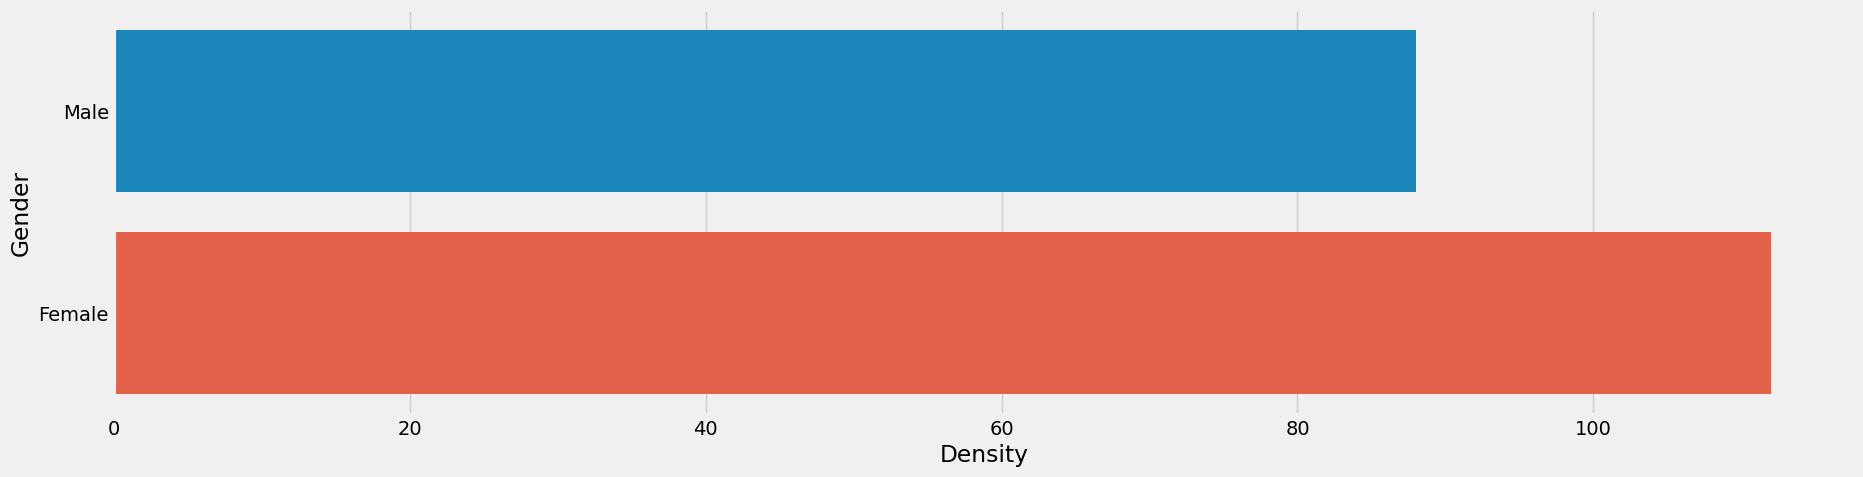

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Gender', data=df)
plt.xlabel("Density")
plt.show()

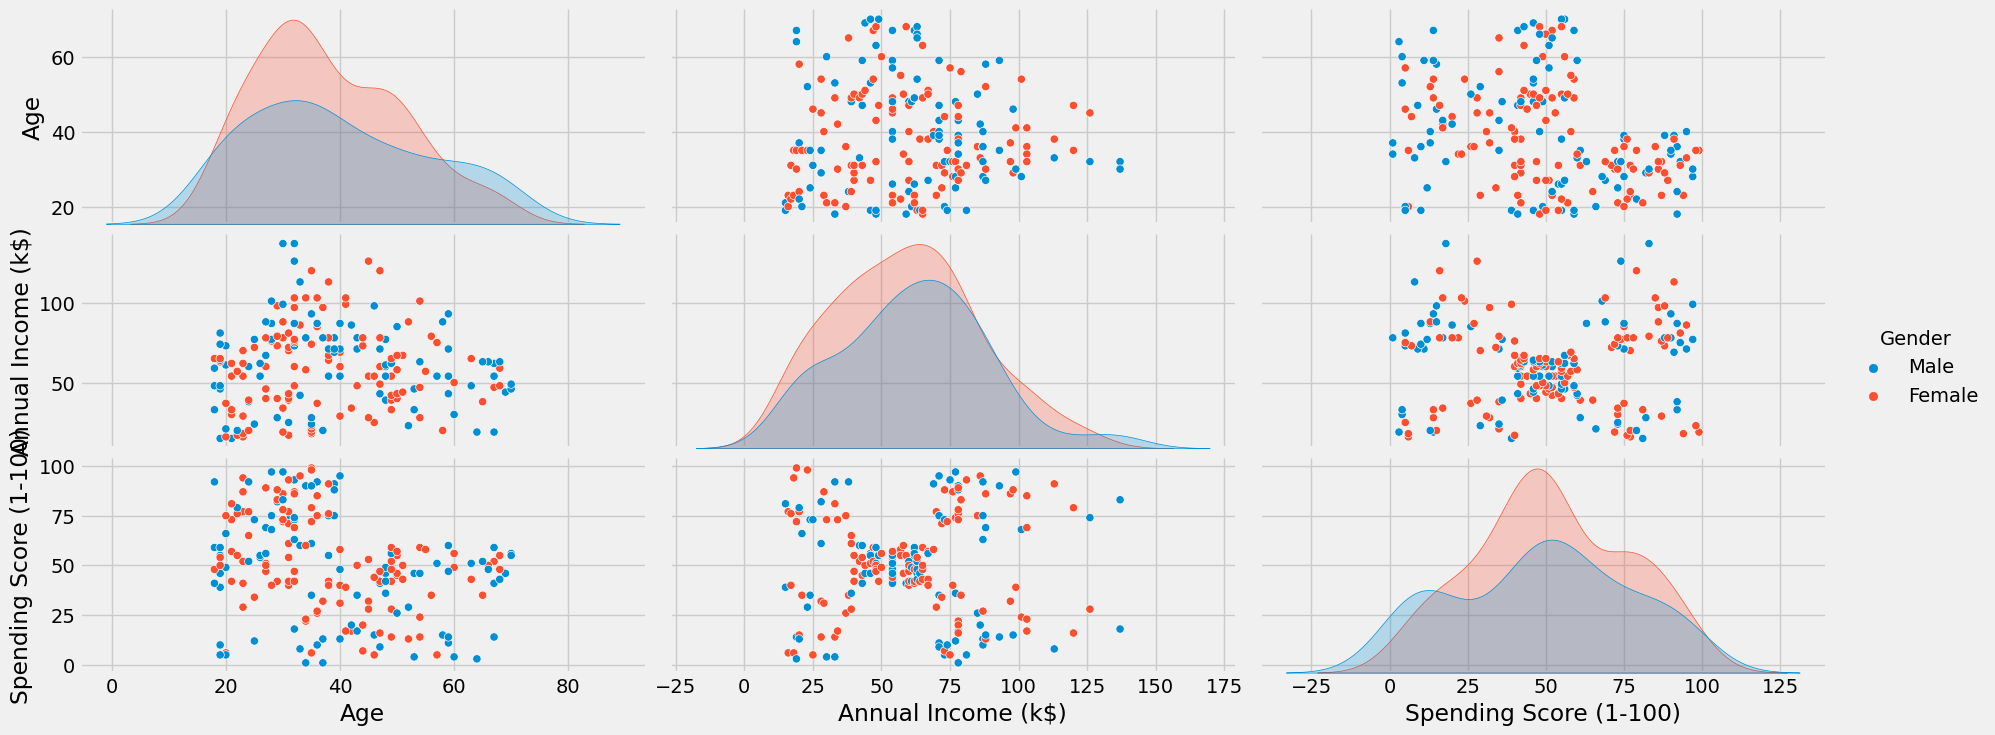

In [16]:
sns.pairplot(data=df, hue='Gender', aspect=2.5)
plt.show()


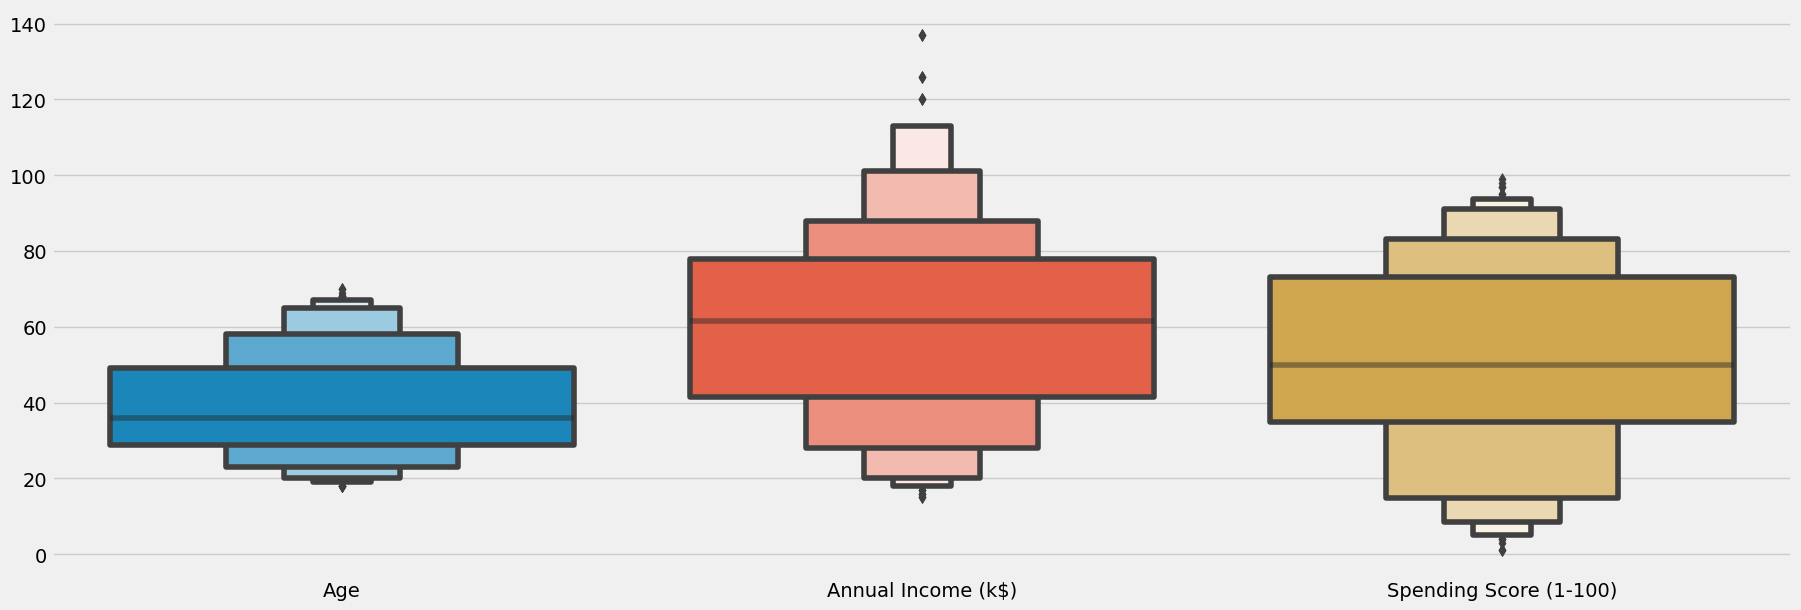

In [17]:
fig, ax = plt.subplots(figsize=(20,7))
sns.boxenplot(df)
plt.show()

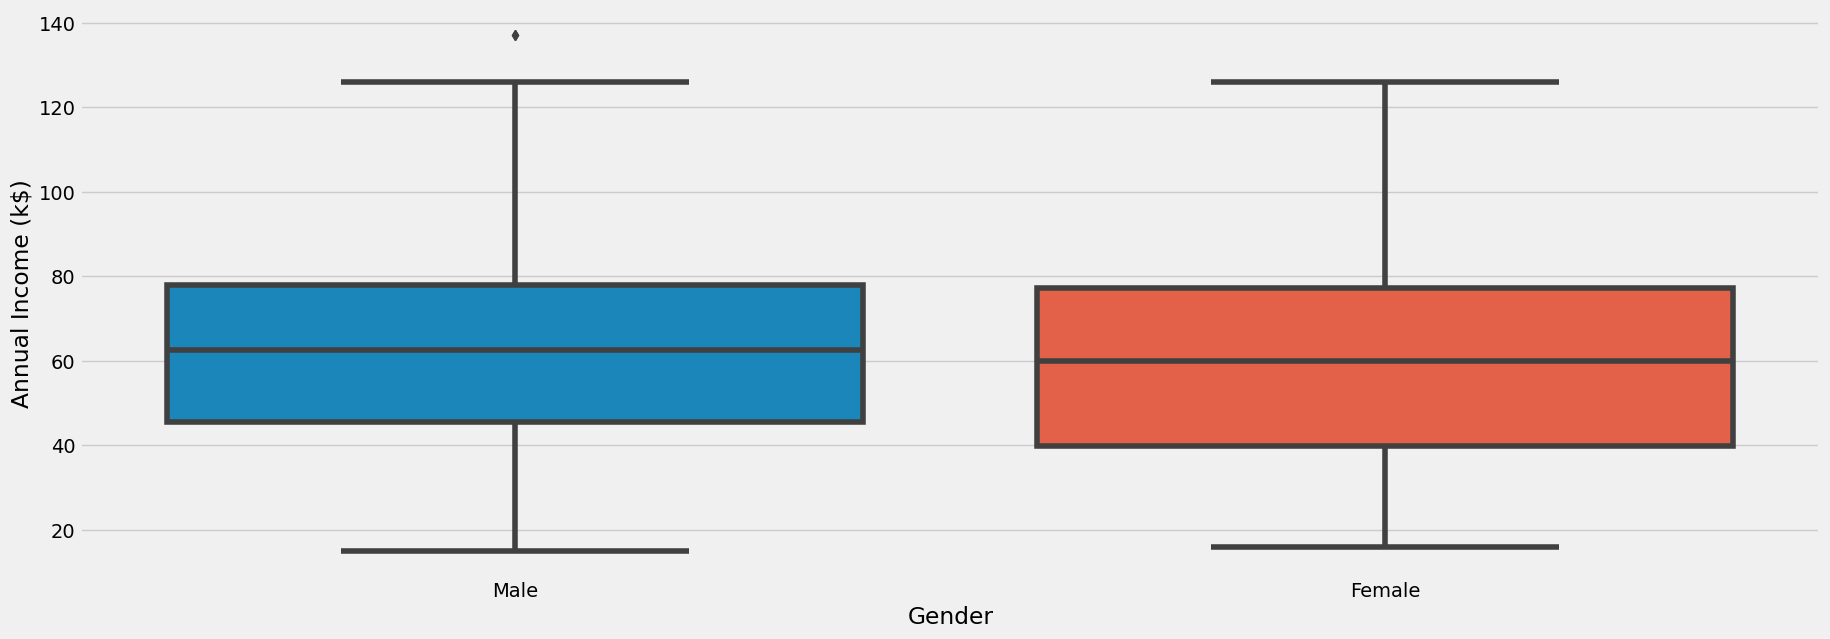

In [18]:
plt.figure(figsize=(20, 7))
sns.boxplot(df, x='Gender', y="Annual Income (k$)")
plt.show()

In [19]:
q1 = df['Annual Income (k$)'].quantile(.25)
q3 = df['Annual Income (k$)'].quantile(.75)

IQR = q3 - q1

print("Quartile Measurements for Annual Income")
print("1st Quartile: {} \n3rd Quartile: {} \nInter Quartile Range: {} \n".format(q1, q3, IQR))

upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

print("Limits based on IQR Rule (Multiply IQR by 1.5, the constant used to detect outliers)")
print("Upper Limit: {} \nLower Limit: {} \n".format(upper_limit, lower_limit))

dataset = df.loc[(df['Annual Income (k$)'] <upper_limit) & (df['Annual Income (k$)'] > lower_limit)]
print('Total Outliers Removed: ',len(df)- len(dataset))

Quartile Measurements for Annual Income
1st Quartile: 41.5 
3rd Quartile: 78.0 
Inter Quartile Range: 36.5 

Limits based on IQR Rule (Multiply IQR by 1.5, the constant used to detect outliers)
Upper Limit: 132.75 
Lower Limit: -13.25 

Total Outliers Removed:  2


In [20]:
print(tabulate(df.groupby(['Gender']).mean()[['Annual Income (k$)','Spending Score (1-100)']], headers='keys', tablefmt='fancy_grid'))
print(tabulate(dataset.groupby(['Gender']).mean()[['Annual Income (k$)','Spending Score (1-100)']], headers='keys', tablefmt='fancy_grid'))

╒══════════╤══════════════════════╤══════════════════════════╕
│ Gender   │   Annual Income (k$) │   Spending Score (1-100) │
╞══════════╪══════════════════════╪══════════════════════════╡
│ Female   │              59.25   │                  51.5268 │
├──────────┼──────────────────────┼──────────────────────────┤
│ Male     │              62.2273 │                  48.5114 │
╘══════════╧══════════════════════╧══════════════════════════╛
╒══════════╤══════════════════════╤══════════════════════════╕
│ Gender   │   Annual Income (k$) │   Spending Score (1-100) │
╞══════════╪══════════════════════╪══════════════════════════╡
│ Female   │              59.25   │                  51.5268 │
├──────────┼──────────────────────┼──────────────────────────┤
│ Male     │              60.4884 │                  48.4651 │
╘══════════╧══════════════════════╧══════════════════════════╛


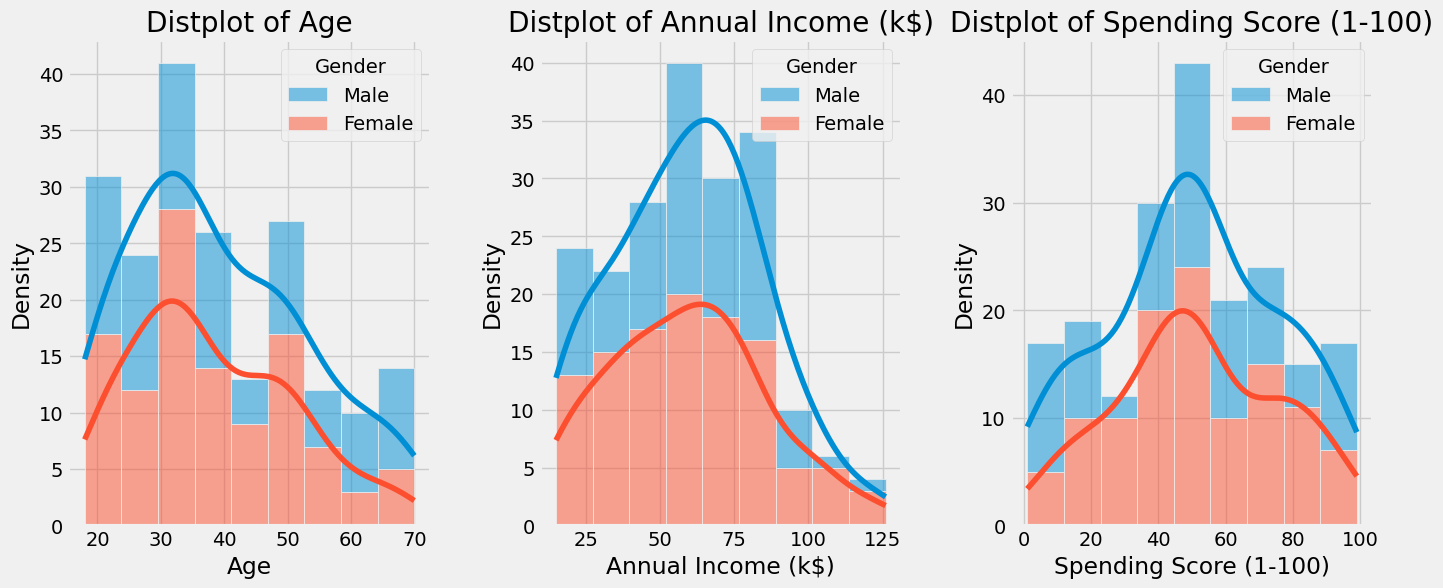

In [21]:
fig,ax = plt.subplots(1, 3, figsize=(15, 6))

for x, axis in zip(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], ax):
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=dataset, x=x, kde=True, ax=axis, hue='Gender', multiple="stack")
    axis.set_title('Distplot of {}'.format(x))
    axis.set(ylabel="Density")

plt.show()

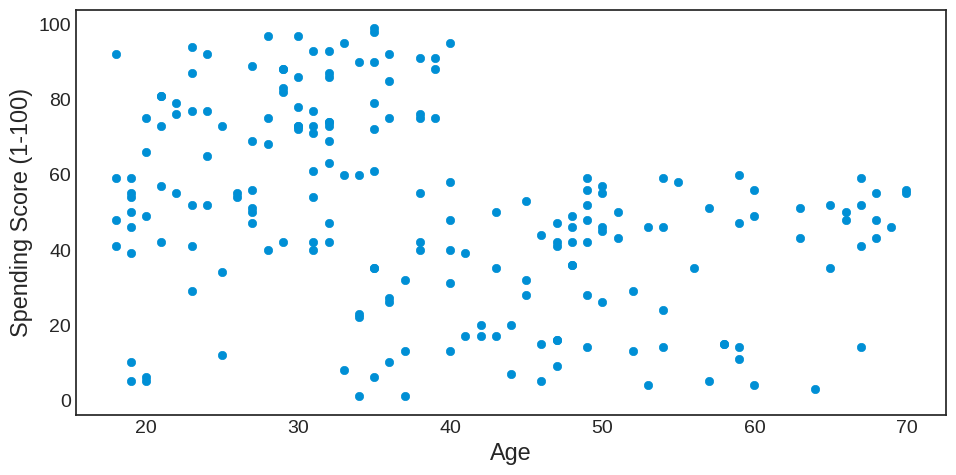

In [22]:
X_arr = dataset[['Age', 'Spending Score (1-100)']].values

X_df = dataset[['Age', 'Spending Score (1-100)']].copy()

plt.style.use('seaborn-v0_8-white')


plt.figure(figsize=(10, 5))
plt.scatter(x=X_arr[:,0], y=X_arr[:,1])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()


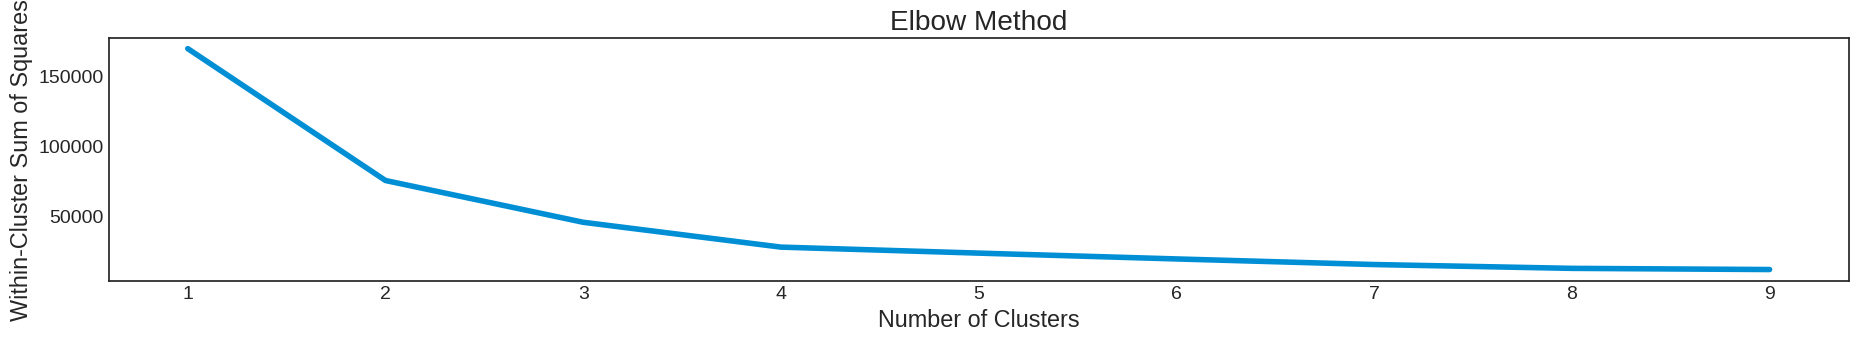

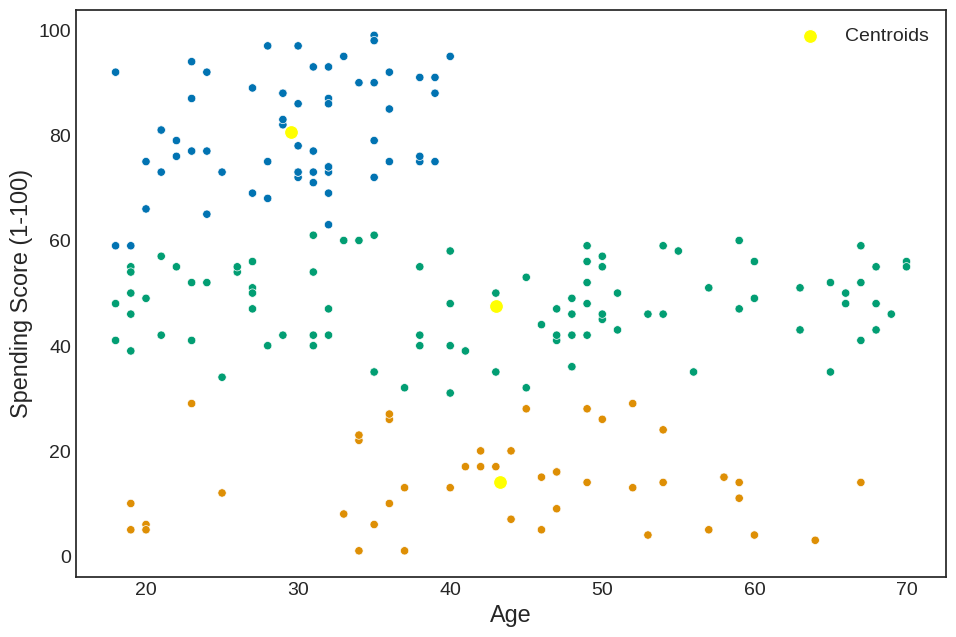

In [23]:
no = kmean_scatter(X_df, 3)

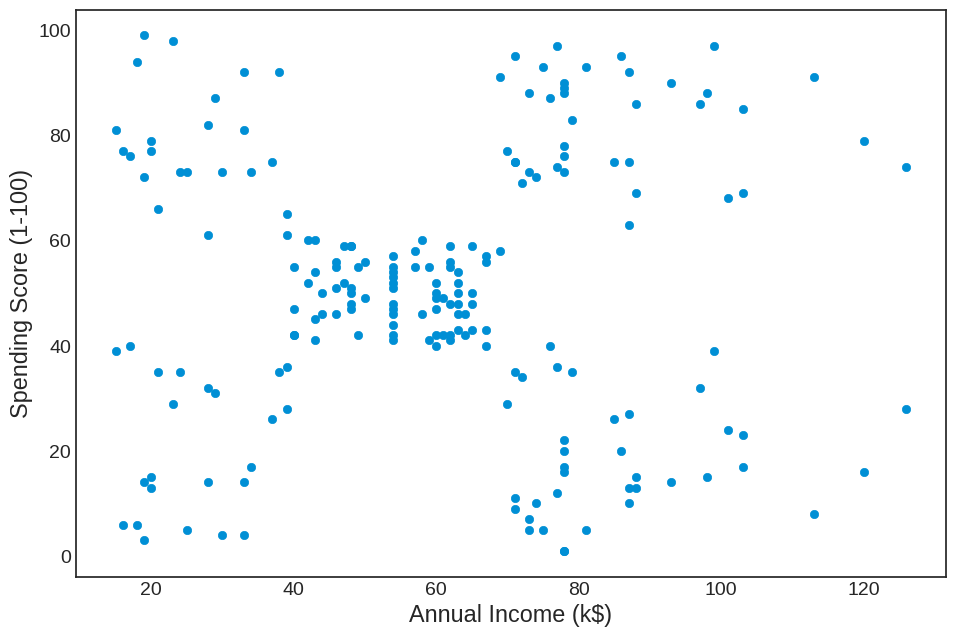

In [24]:
X_arr = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].copy()



plt.figure(figsize=(10, 7))
plt.scatter(x=X_arr[:,0], y=X_arr[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


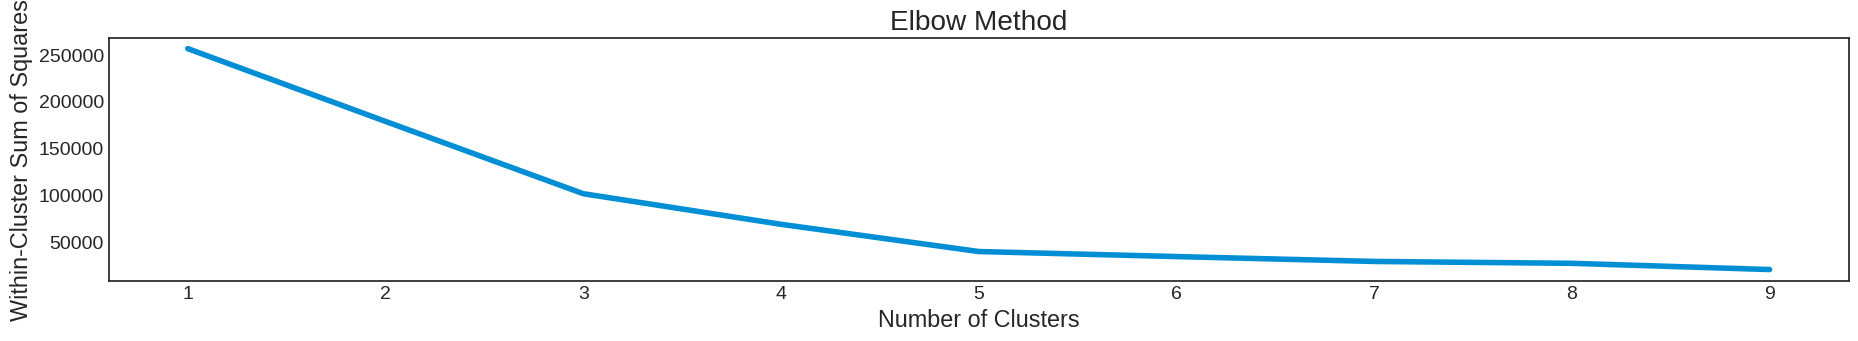

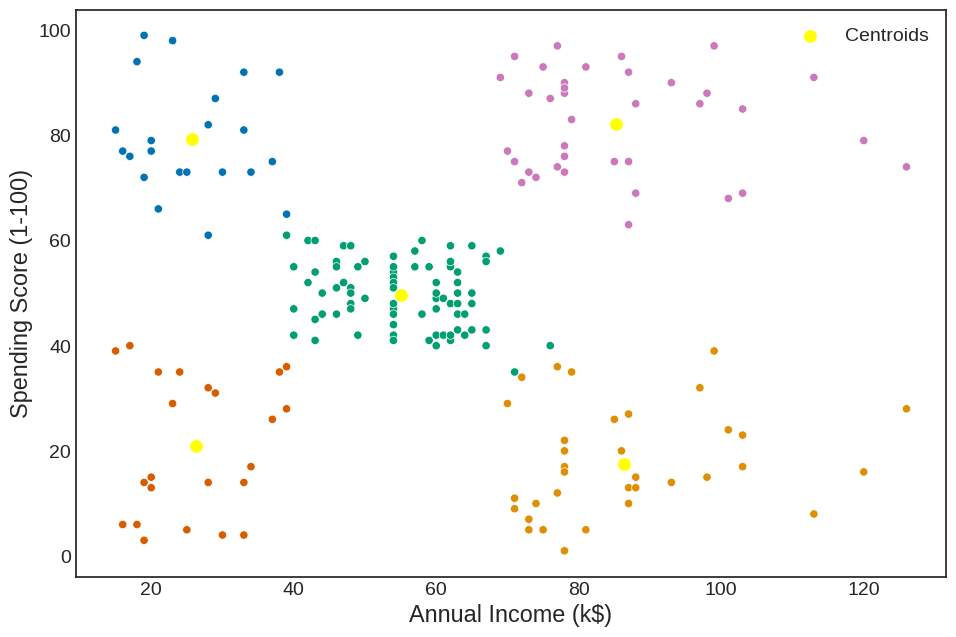

In [25]:
labels = kmean_scatter(X,5)

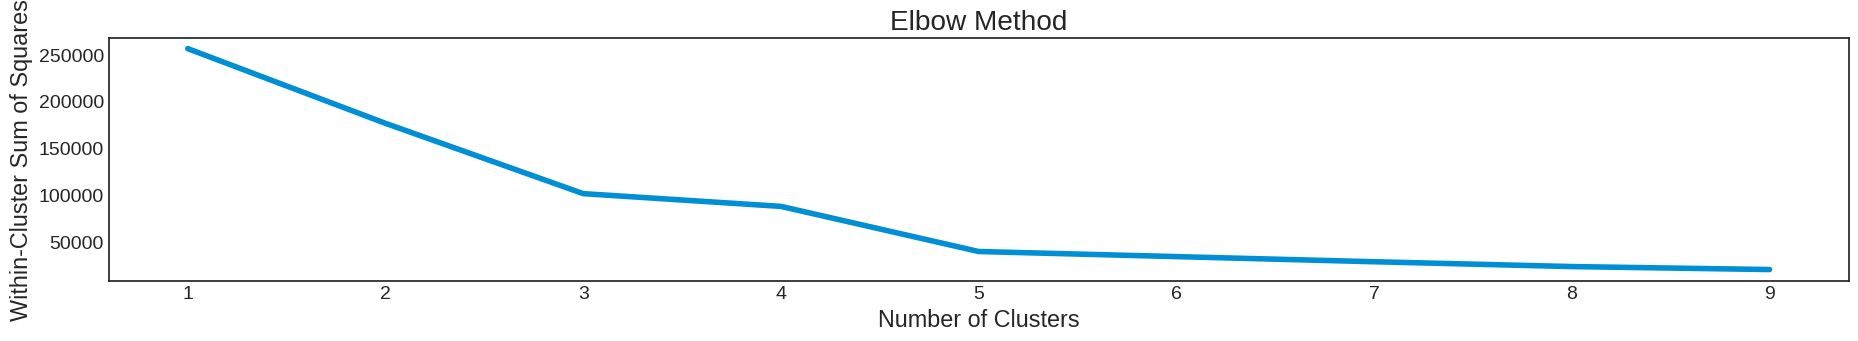

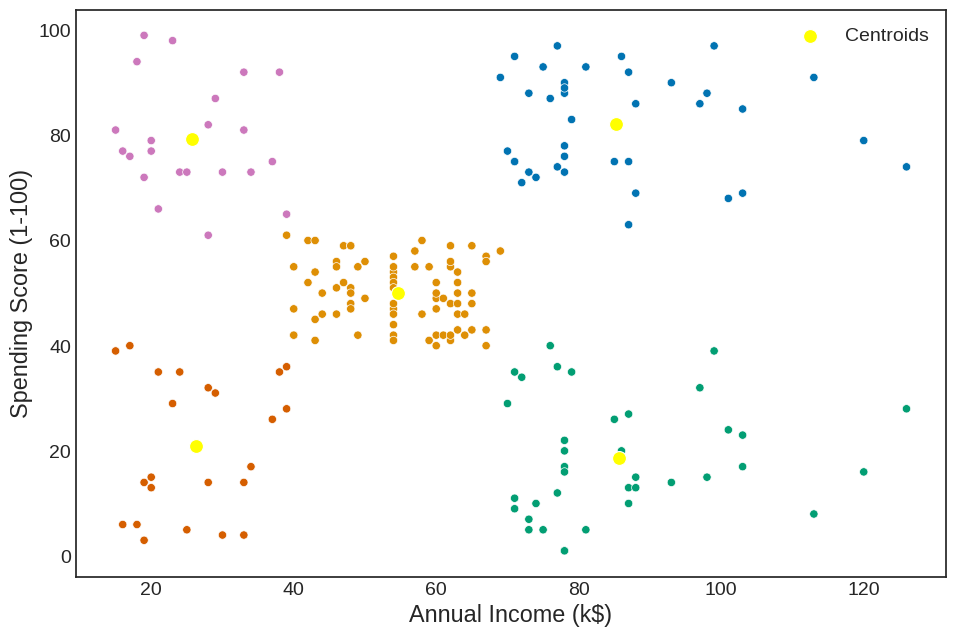

In [26]:
labels = kmean_scatter(X,5)

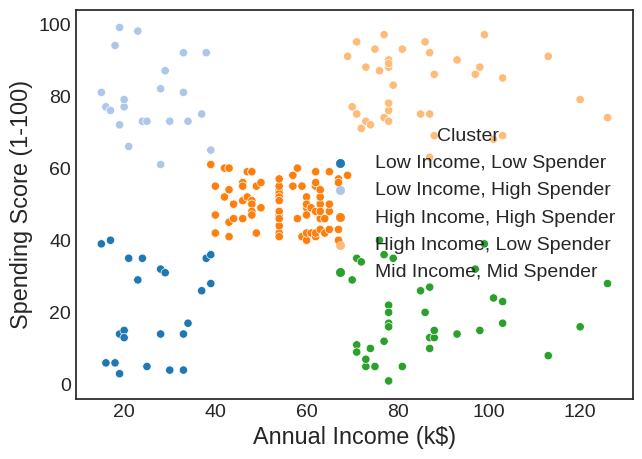

In [27]:
X_c = X.copy()
X_c.loc[:, 'labels'] = labels
X_c.labels.value_counts()

cluster = {0: 'High Income, Low Spender', 2: 'Mid Income, Mid Spender', 1: 'High Income, High Spender',
          4: 'Low Income, High Spender', 3: 'Low Income, Low Spender'}

X_c['Cluster'] = X_c['labels'].map(cluster)
X_c.drop('labels', axis=1, inplace=True)

sns.scatterplot(data=X_c, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',  palette="tab20");

**Analysis & Strategy**


High-Income, High Spender


Low Income, High Spender


Mid Income, Mid Spender


High Income, Low Spender


 Low Income, Low Spender
